In [256]:
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import json

Model 1.0 non-split

In [257]:
with open('/Users/13122/Desktop/data/doc2vec_testingData.json', 'r') as file:
    data = json.load(file)

In [258]:
#save text data#
text_data = [data["data"][i]["text"] for i in range(119)]
#save overall ranking#
rank_overall = data["overview"]["example_ranking"]["overall"]
#save high ranking#
rank_high = data["overview"]["example_ranking"]["high"]
#save medium ranking#
rank_med = data["overview"]["example_ranking"]["medium"]
#save low ranking#
rank_low = data["overview"]["example_ranking"]["low"]
#save none ranking#
rank_non = data["overview"]["example_ranking"]["none"]
#save query#
query = data["query"]

In [259]:
def embed_sentences(sentences):
    # Load the Universal Sentence Encoder module
    module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
    model = hub.load(module_url)
    # Generate embeddings for the sentences
    embeddings = model(sentences)
    return embeddings

In [260]:
#get emb_vec#
Input = [query] + text_data
emb_vec = embed_sentences(Input)


0.9999999

{'whiskers': [<matplotlib.lines.Line2D at 0x2a38b7a08e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a38b79f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a38b7a0880>],
 'medians': [<matplotlib.lines.Line2D at 0x2a38b79fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a38b79ffa0>],
 'means': []}

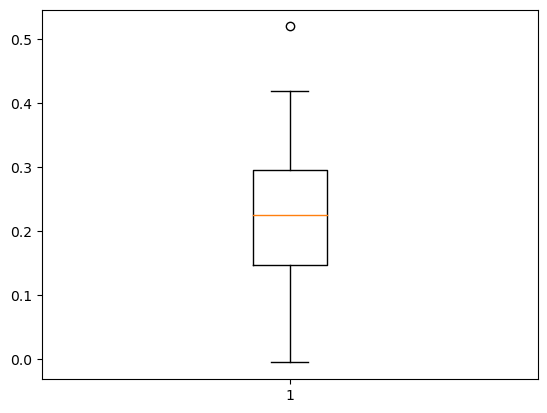

In [261]:
#calculate relevance#
title_vec = emb_vec[0]
text_vec_list = emb_vec[1:]
score_list =[np.dot(title_vec, text_vec_list[i]) for i in range(len(text_vec_list))]
plt.boxplot(score_list)

In [262]:
rank_non.pop(-1)

122

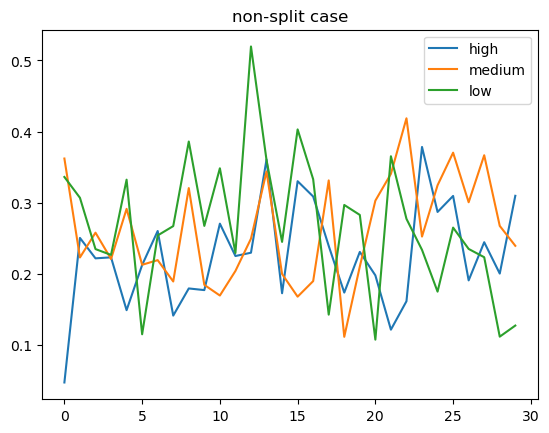

In [263]:
test_score_high = [score_list[i-1] for i in rank_high]
test_score_med = [score_list[i-1] for i in rank_med]
test_score_low = [score_list[i-1] for i in rank_low]
test_score_non = [score_list[i-1] for i in rank_non]

plt.plot(test_score_high, label = "high")
plt.plot(test_score_med, label = "medium")
plt.plot(test_score_low, label = "low")
#plt.plot(test_score_non, label = "none")
plt.title("non-split case")
plt.legend()

Comment: it looks the grouping is not done well

Model 1.0 split

In [264]:
text_data_split = [text_data[i].split(". ") for i in range(len(text_data))]
text_data_split_exp = []
for i in text_data_split:
    text_data_split_exp += i

In [265]:
Input_split = [query] + text_data_split_exp
emb_vec_split = embed_sentences(Input_split)


In [279]:
np.linalg.norm(emb_vec_split[0])

0.9999999

In [266]:
title_vec_split = emb_vec_split[0]
text_vec_split = emb_vec_split[1:]
score_split_list =[np.dot(title_vec_split, text_vec_split[i]) for i in range(len(text_vec_split))]
split_length = [len(i) for i in text_data_split]
score_split_ave = []
t = 0
for i in range(len(text_data_split)):
    score = sum(score_split_list[t:split_length[i]+t])/split_length[i]
    score_split_ave.append(score)
    t += split_length[i]
    

In [267]:
text_data_split[-1]

['Socially conscious novels by authors like Upton Sinclair and Charles Dickens brought attention to economic inequality and harsh living conditions of the working classes and poor.']

{'whiskers': [<matplotlib.lines.Line2D at 0x2a388046e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2a388046bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a388057610>],
 'medians': [<matplotlib.lines.Line2D at 0x2a387fa4e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a387f9a340>],
 'means': []}

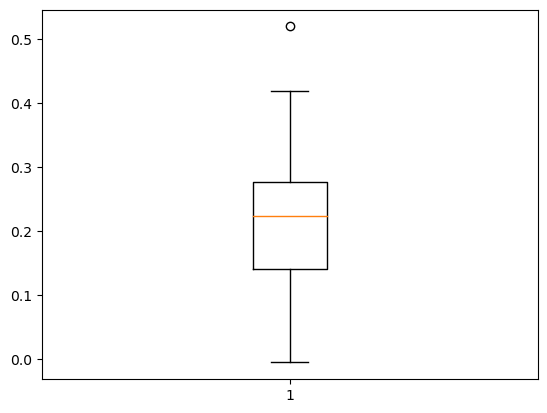

In [268]:
plt.boxplot(score_split_ave)

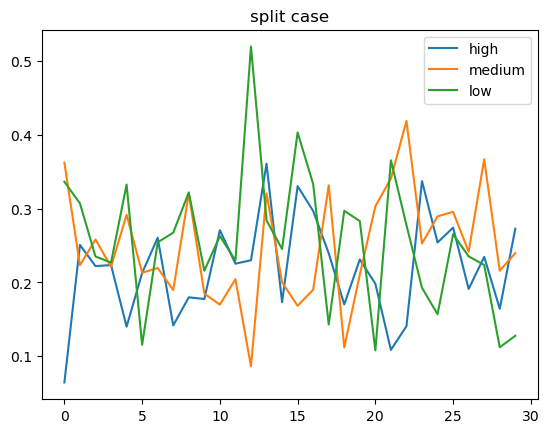

In [269]:
test_split_score_high = [score_split_ave[i-1] for i in rank_high]
test_split_score_med = [score_split_ave[i-1] for i in rank_med]
test_split_score_low = [score_split_ave[i-1] for i in rank_low]
test_split_score_non = [score_split_ave[i-1] for i in rank_non]

plt.plot(test_split_score_high, label = "high")
plt.plot(test_split_score_med, label = "medium")
plt.plot(test_split_score_low, label = "low")
#plt.plot(test_split_score_non, label = "none")
plt.title("split case")
plt.legend()

Model 1.0 split and Max

In [270]:
score_split_max = []
t = 0
for i in range(len(text_data_split)):
    score = max(score_split_list[t:split_length[i]+t])
    score_split_max.append(score)
    t += split_length[i]


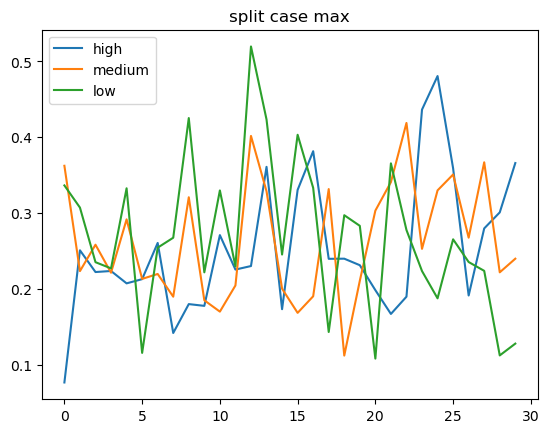

In [271]:
test_splitmax_score_high = [score_split_max[i-1] for i in rank_high]
test_splitmax_score_med = [score_split_max[i-1] for i in rank_med]
test_splitmax_score_low = [score_split_max[i-1] for i in rank_low]
test_splitmax_score_non = [score_split_max[i-1] for i in rank_non]

plt.plot(test_splitmax_score_high, label = "high")
plt.plot(test_splitmax_score_med, label = "medium")
plt.plot(test_splitmax_score_low, label = "low")
#plt.plot(test_splitmax_score_non, label = "none")
plt.title("split case max")
plt.legend()

Model 1.0 Analyze the difference between splot and non-split case

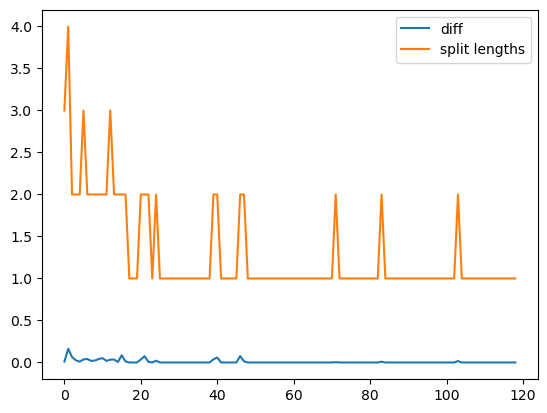

In [272]:
diff = [abs(score_list[i] - score_split_ave[i]) for i in range(len(score_list))]
plt.plot(diff, label = "diff")
plt.plot(split_length, label = "split lengths")
plt.legend()

Further Analysis about Score

In [273]:
#high rank score#
high_ave = sum(test_score_high)/len(test_score_high)
med_ave = sum(test_score_med)/len(test_score_med)
low_ave = sum(test_score_low)/len(test_score_low)
non_ave = sum(test_score_non)/len(test_score_non)

high_split_ave = sum(test_split_score_high)/len(test_split_score_high)
med_split_ave = sum(test_split_score_med)/len(test_split_score_med)
low_split_ave = sum(test_split_score_low)/len(test_split_score_low)
non_split_ave = sum(test_split_score_non)/len(test_split_score_non)

high_split_max = sum(test_splitmax_score_high)/len(test_splitmax_score_high)
med_split_max = sum(test_splitmax_score_med)/len(test_splitmax_score_med)
low_split_max = sum(test_splitmax_score_low)/len(test_splitmax_score_low)
non_split_max = sum(test_splitmax_score_non)/len(test_splitmax_score_non)

print([high_ave, med_ave, low_ave, non_ave])
print([high_split_ave,med_split_ave,low_split_ave,non_split_ave])
print([high_split_max,med_split_max,low_split_max,non_split_max])



[0.22707892283797265, 0.2616428226232529, 0.26715544735391933, 0.10159202570352575]
[0.2191862342465255, 0.2480317276281615, 0.255898376305898, 0.10195587691048096]
[0.2533783016105493, 0.263060728708903, 0.2684573523700237, 0.10888390641274123]


In [274]:
def reject_outliers(data):
    m=0.1
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - m* s < e < u + m* s)]
    return filtered

high_adjust_ave = sum(reject_outliers(test_score_high))/len(reject_outliers(test_score_high))
med_adjust_ave = sum(reject_outliers(test_score_med))/len(reject_outliers(test_score_med))
low_adjust_ave = sum(reject_outliers(test_score_low))/len(reject_outliers(test_score_low))
non_adjust_ave = sum(reject_outliers(test_score_non))/len(reject_outliers(test_score_non))

high_split_adjust_ave = sum(reject_outliers(test_split_score_high))/len(reject_outliers(test_split_score_high))
med_split_adjust_ave = sum(reject_outliers(test_split_score_med))/len(reject_outliers(test_split_score_med))
low_split_adjust_ave = sum(reject_outliers(test_split_score_low))/len(reject_outliers(test_split_score_low))
non_split_adjust_ave = sum(reject_outliers(test_split_score_non))/len(reject_outliers(test_split_score_non))

high_split_adjust_max = sum(reject_outliers(test_splitmax_score_high))/len(reject_outliers(test_splitmax_score_high))
med_split_adjust_max = sum(reject_outliers(test_splitmax_score_med))/len(reject_outliers(test_splitmax_score_med))
low_split_adjust_max = sum(reject_outliers(test_splitmax_score_low))/len(reject_outliers(test_splitmax_score_low))
non_split_adjust_max = sum(reject_outliers(test_splitmax_score_non))/len(reject_outliers(test_splitmax_score_non))

print([high_adjust_ave, med_adjust_ave, low_adjust_ave, non_adjust_ave])
print([high_split_adjust_ave,med_split_adjust_ave,low_split_adjust_ave,non_split_adjust_ave])
print([high_split_adjust_max,med_split_adjust_max,low_split_adjust_max,non_split_adjust_max])

[0.2263691544532776, 0.2628526836633682, 0.26671820878982544, 0.09916301816701889]
[0.22087135538458824, 0.24704043567180634, 0.25850865989923477, 0.09916301816701889]
[0.25559502840042114, 0.2627415955066681, 0.2700258394082387, 0.10594341158866882]


In [275]:
score_list[29]


0.34072208

In [276]:
high_text = [text_data[i-1] for i in rank_high]
med_text = [text_data[i-1] for i in rank_med]
low_text = [text_data[i-1] for i in rank_low]
print(low_text)

["While Lawrence Kohlberg's theory of moral development stages made valuable contributions to psychology, contemporary researchers recognize that morality is multifaceted and develops through complex interactions of biology, social environment and culture.", "Psychologist Carol Gilligan criticized Lawrence Kohlberg's theory of universal moral development stages for a male gender bias, arguing that women often demonstrate a distinct moral voice and approach ethical dilemmas through an 'ethic of care'.", "Carol Gilligan's research revealed different patterns in male and female moral reasoning, critiquing Lawrence Kohlberg's theory of universal developmental stages as biased towards male perspectives.", "Psychologist Carol Gilligan's research found differences in male and female approaches to moral conflicts, critiquing Kohlberg's theory of universal developmental stages for having a male bias.", "Psychologist Carol Gilligan critiqued Lawrence Kohlberg's theory of universal moral developm